In [10]:
from datetime import datetime
from mpetools import get_info_islands, run_all_functions, match_time_frames_frequency, get_OpenStreetMap_data
import ee
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import os
import pickle
import pytz
import pymannkendall as mk
import matplotlib.pyplot as plt

try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Choose the island
* Keredhdhoo is a small, almost unihabited island in Huvadhoo Atoll.
* Aslam & Kench (2017): eroding island.

In [55]:
island = 'Banaba'
country = 'Kiribati'

# Retrieve all time series about the island
### Run all functions OR retrieve available information

In [60]:
run = True

if run:
    island_info = run_all_functions.run_all_functions(island, country)

else:
    island_info = get_info_islands.retrieve_info_island(island, country)    


-------------------------------------------------------------------
PRE-TIME-SERIES INFORMATION
Island: Banaba, Kiribati
-------------------------------------------------------------------

~ All information is already available, returning information. ~

-------------------------------------------------------------------
RETRIEVING CLIMATE INDICES (NOAA Physical Sciences Laboratory) DATA
Island: Banaba, Kiribati
-------------------------------------------------------------------

~ Retrieving Pacific North American Index. ~
~ Retrieving East Pacific/North Pacific Oscillation. ~
~ Retrieving Western Pacific Index. ~
~ Retrieving Eastern Atlantic/Western Russia. ~
~ Retrieving North Atlantic Oscillation. ~
~ Retrieving North Atlantic Oscillation (Jones). ~
~ Retrieving Southern Oscillation Index. ~
~ Retrieving Eastern Tropical Pacific SST (anomalies). ~
~ Retrieving Eastern Tropical Pacific SST (mean values). ~
~ Retrieving Bivariate ENSO Timeseries. ~
~ Retrieving Tropical Northern A

# Retrieve coastal change time series (`CoastSat`)

In [28]:
filepath = os.path.join(os.getcwd(), 'data', 'coastsat', '{}_{}'.format(island, country), 'transect_time_series.csv'.format(island, country))
df = pd.read_csv(filepath, parse_dates=['dates'])
dates = [_.to_pydatetime() for _ in df['dates']]
df['dates'] = dates
df_new = df.set_index('dates').drop('Unnamed: 0', axis=1)

In [30]:
df_coastlines = df_new.groupby(pd.Grouper(freq='M')).mean()

In [31]:
# Start and end dates as `datetime`
start_date = pytz.utc.localize(datetime.strptime('2015-06-01', '%Y-%m-%d'))
end_date = pytz.utc.localize(datetime.strptime('2020-01-01', '%Y-%m-%d'))

In [32]:
df_coastlines_tf = df_coastlines[(df_coastlines.index >= start_date) & (df_coastlines.index <= end_date)]

In [33]:
df_coastlines_tf_filled = df_coastlines_tf.fillna(df_coastlines_tf.rolling(2, min_periods=1, center=True).mean())

In [34]:
dict_trend = {}
for col in df_coastlines_tf_filled.columns:
    print(col)
    print(adfuller(df_coastlines_tf_filled[col].values))
    print(mk.original_test(df_coastlines_tf_filled[col].values))
    dict_trend[col] = mk.original_test(df_coastlines_tf_filled[col].values)[0]

1
(-2.6743781617980917, 0.07857787149837978, 3, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 359.42691446798204)
Mann_Kendall_Test(trend='decreasing', h=True, p=0.00015096301002115453, z=-3.789479925104077, Tau=-0.35218855218855216, s=-523.0, var_s=18975.0, slope=-0.5992285910912133, intercept=198.31854577482179)
2
(-5.556418317439688, 1.5772014600916584e-06, 0, 54, {'1%': -3.55770911573439, '5%': -2.9167703434435808, '10%': -2.59622219478738}, 357.99495170436825)
Mann_Kendall_Test(trend='decreasing', h=True, p=0.024880246630055947, z=-2.2432569983347053, Tau=-0.20875420875420875, s=-310.0, var_s=18974.0, slope=-0.16703601616110358, intercept=151.39733104334297)
3
(-4.159150096927894, 0.0007720378134078406, 3, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 371.32256502474314)
Mann_Kendall_Test(trend='no trend', h=False, p=0.47231752076961375, z=-0.7187134072334493, Tau=-0.06734006734006734, s=-100.0, var_s=

In [305]:
for i in dict_trend:
    print(i, dict_trend[i])

1 decreasing
2 decreasing
3 no trend
4 no trend
5 decreasing
6 decreasing
7 no trend
8 no trend
9 no trend
10 no trend
11 no trend
12 no trend
13 increasing
14 no trend
15 increasing
16 no trend
17 no trend
18 increasing
19 no trend
20 no trend
21 no trend
22 no trend
23 increasing
24 no trend
25 no trend
26 no trend
27 no trend
28 no trend
29 no trend
30 no trend
31 no trend
32 no trend
33 no trend
34 no trend
35 no trend
36 increasing
37 increasing
38 no trend
39 no trend
40 no trend
41 no trend
42 no trend
43 no trend
44 no trend
45 no trend
46 no trend
47 no trend
48 increasing
49 increasing
50 no trend
51 no trend
52 no trend
53 no trend
54 no trend
55 decreasing


# Match time frames

In [35]:
date_range = ['2015-06-01', '2020-01-01']

island_info, df_timeseries = match_time_frames_frequency.MatchTimeFrameFrequency(island, country, date_range=date_range, frequency='monthly').main()


-------------------------------------------------------------------
PRE-TIME-SERIES INFORMATION
Island: Keredhdhoo, Maldives
-------------------------------------------------------------------

~ All information is already available, returning information. ~

-------------------------------------------------------------------
RETRIEVING DISASTERS (EM-DAT) DATA
Island: Keredhdhoo, Maldives
-------------------------------------------------------------------

~ Information already available. Returning data. ~

-------------------------------------------------------------------
RETRIEVING CLIMATE INDICES (NOAA Physical Sciences Laboratory) DATA
Island: Keredhdhoo, Maldives
-------------------------------------------------------------------

~ Information already available. Returning data. ~

-------------------------------------------------------------------
RETRIEVING TIME SERIES FOR TIDE-GAUGE SEA-LEVEL (PSMSL) DATA
Island: Keredhdhoo, Maldives
------------------------------------------

In [36]:
df_timeseries.index = [pytz.utc.localize(df_timeseries.index[i]) for i in range(len(df_timeseries.index))]

In [37]:
df_total = pd.concat([df_timeseries, df_coastlines_tf_filled], axis=1)
df_total.columns

Index(['wave_energy', 'pna', 'wp', 'ea', 'nao', 'jonesnao', 'soi',
       'nina3.anom', 'nina3', 'censo',
       ...
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55'],
      dtype='object', length=101)

# Select variables for causal discovery

In [38]:
transect = 19
var_names = ['wave_energy', 'sea_level_anomaly', 'mean_SST', 'mean_sea_level_pressure', 'total_precipitation', 'mean_2m_air_temperature', 'u_component_of_wind_10m', 'v_component_of_wind_10m', '{}'.format(transect)]#, 'meiv2']#, '18', '36', '7', '27']
df_selected_variables = df_total[var_names]

# Causal discovery with `Tigramite`

In [39]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib qt    
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI

# Analysis with raw data

In [435]:
data = df_selected_variables.values
datatime = np.linspace(2015, 2020, np.shape(df_selected_variables.values)[0])
N = np.shape(df_selected_variables.values)[1]
T = np.shape(df_selected_variables.values)[0]

In [18]:
dataframe = pp.DataFrame(df_selected_variables.values, 
                         datatime = {0:np.linspace(2015, 2020, np.shape(df_selected_variables.values)[0])}, 
                         var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()

# Analysis without seasons and trends

In [40]:
import pandas as pd
from statsmodels.tsa.seasonal import STL

var = ['WE', 'SLA', 'SST', 'MSLP', 'TP', 'AT', 'WU', 'WV', 'CP_{}'.format(transect)]

# Assuming you have a pandas DataFrame with a 'date' column and 'value' column
# where 'date' is the timestamp and 'value' is the time series values
# data = pd.DataFrame({'date': [...], 'value': [...]})
data = df_selected_variables.copy()

for idx, col in enumerate(data.columns):

    # Perform seasonal decomposition
    stl = STL(data[col], seasonal=13)  # seasonal period of 13 for monthly data
    res = stl.fit()

    # Remove trend and seasonality from the original time series
    detrended = data[col] - res.trend - res.seasonal

    # Plot the original, trend, and seasonally adjusted time series
    #res.plot()

    if idx == 0:
        # Initialize a DataFrame with the detrended time series
        df_detrended = pd.DataFrame({col:detrended})
    else:
        # Add the detrended time series to DataFrame
        df_detrended = pd.concat([df_detrended, pd.DataFrame({col:detrended})], axis=1)


In [41]:
df = df_detrended.copy()

In [43]:
import matplotlib.colors as mcolors

colors = list(mcolors.TABLEAU_COLORS.values())[:len(df_detrended.columns)]

# Create subplots
fig, axs = plt.subplots(len(df_detrended.columns), 1, sharex=True)

for iidx in range(len(df_detrended.columns)):

    # Plot data on each subplot 
    #axs[iidx].plot(df_selected_variables.index, df_selected_variables[df_selected_variables.columns[iidx]])
    axs[iidx].plot(df_detrended.index, df_detrended[df_detrended.columns[iidx]], color=colors[iidx])
    axs[iidx].set_ylabel(var[iidx])

axs[len(df_detrended.columns)-1].set_xlabel('time')

# Adjust spacing between subplots if needed
plt.subplots_adjust(hspace=0.5)
plt.xlim(df_detrended.index[0], df_detrended.index[-1])

# Display the plot
plt.savefig('timeseries_{}.png'.format(transect), dpi=300)#, bbox_inches='tight')
plt.show()

In [16]:
data = df_detrended.values
N = np.shape(data)[1]
T = np.shape(data)[0]
datatime = np.linspace(2015, 2020-1./12., T)

In [17]:
dataframe = pp.DataFrame(data, var_names=var, datatime=datatime)
#tp.plot_timeseries(dataframe); plt.show()

In [ ]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']

matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()

tp.plot_densityplots(dataframe=dataframe, add_densityplot_args={'matrix_lags':matrix_lags})
plt.show()


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


In [52]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

correlations = pcmci.get_lagged_dependencies(tau_max=25, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 25


In [18]:
def get_df_results(results, tau_range, var):
    arr_results = np.array(['causal link', 'tau', 'val_matrix', 'frequency'], dtype=object)
    for tau in tau_range:
        idx_non_empty = np.argwhere(results['graph'][:, :, tau] != '')

        if np.shape(idx_non_empty)[0] > 0:
            for idx in range(len(idx_non_empty)):
                result_link = ' '.join(np.array([var[idx_non_empty[idx][0]], results['graph'][idx_non_empty[idx][0], idx_non_empty[idx][1], tau], var[idx_non_empty[idx][1]]]))
                result_val_matrix = results['val_matrix'][idx_non_empty[idx][0], idx_non_empty[idx][1], tau]
                arr_results = np.row_stack((arr_results, np.array([result_link, tau, result_val_matrix, 1])))

    df_results = pd.DataFrame(arr_results[1:], columns=arr_results[0])
    df_results = df_results.set_index('causal link')
    df_results['frequency'] = df_results['frequency'].astype(int)
    df_results['val_matrix'] = df_results['val_matrix'].astype(float)

    return df_results

In [19]:
%matplotlib inline

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=0)

for it, i in enumerate(range(1, 25)):    
    pcmci.verbosity = 0
    pc_alpha = 0.05
    tau_max = i
    results = pcmci.run_pcmciplus(tau_max=tau_max, pc_alpha=pc_alpha)

    '''
    tp.plot_graph(
        val_matrix=results['val_matrix'],
        graph=results['graph'],
        var_names=var,
        link_colorbar_label='cross-MCI',
        node_colorbar_label='auto-MCI',
        show_autodependency_lags=False
        ); plt.show()
    '''

    df_results = get_df_results(results, tau_range=range(0, tau_max+1), var=var)

    if it == 0:
        df_results_total = df_results
    
    else:
        df_results_total = pd.concat([df_results_total, df_results], axis=0)

df_results_total_agg = df_results_total.groupby([df_results_total.index, 'tau']).agg({'val_matrix': 'mean', 'frequency': 'sum'})


In [416]:
df_results_total_agg

val_matrix  frequency
causal link  tau                       
AT --> AT    18     0.882659          2
AT --> CP_44 8     -0.808485          1
             9     -0.527712          2
AT --> MSLP  19     0.610059          2
             4     -0.361569          2
...                      ...        ...
WV --> WU    2     -0.460761          5
WV --> WV    12    -0.894014          4
WV <-- WU    0     -0.476866          1
WV o-o WU    0     -0.020139          3
WV x-x SLA   0     -0.426188          1

[159 rows x 2 columns]

In [20]:
mean = int(np.round(np.mean(df_results_total_agg.frequency.values), 0))
std = int(np.round(np.std(df_results_total_agg.frequency.values), 0))

print('1 sigma:', mean, '+/-', std)

1 sigma: 3 +/- 2


### Go from `pd.DataFrame` to `results['graph']`

In [24]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
import matplotlib.colors as mcolors

from tigramite.models import LinearMediation, Prediction

%matplotlib qt

In [22]:
med = LinearMediation(dataframe=dataframe)

In [25]:
for n_sigma in range(3, 4):
    idxx = np.where(df_results_total_agg.frequency.values >= n_sigma)
    df = df_results_total_agg.iloc[idxx[0]]
    df = df.reset_index()

    tau_max = max((df.tau.values).astype(int))
    n_var = len(var)
    var_of_interest = 'CP_{}'.format(transect)
    idx_var_of_interest = np.where(np.array(var) == var_of_interest)[0][0]

    graph_mean = np.full((n_var, n_var, tau_max+1), '', dtype=object)
    val_matrix_mean = np.zeros((n_var, n_var, tau_max+1))

    set_of_interest = []

    for idx, row in df.iterrows():
        fvar, edge, svar = row['causal link'].split(' ')
        i_fvar, i_svar = np.where(np.array(var) == fvar)[0][0], np.where(np.array(var) == svar)[0][0]
        
        if (fvar == var_of_interest and edge == '-->') or (svar == var_of_interest and edge == '<--'):
            continue
 
        if edge == '-->' or edge == '<--':
            graph_mean[i_fvar, i_svar, int(row['tau'])] = edge
            val_matrix_mean[i_fvar, i_svar, int(row['tau'])] = row['val_matrix']
            val_matrix_mean[i_svar, i_fvar, int(row['tau'])] = row['val_matrix']

            if (fvar == var_of_interest) or (svar == var_of_interest):
                set_of_interest.append([i_fvar, int(row['tau']), i_svar])

    tp.plot_graph(graph=graph_mean, val_matrix=val_matrix_mean, var_names=var, show_autodependency_lags=False)
    plt.savefig('stability_graph_transect_{}_sigma_{}.png'.format(transect, n_sigma), dpi=300, bbox_inches='tight')
    plt.show()

    # Initialize dataframe object, specify variable names
    med.fit_model(all_parents=toys.dag_to_links(graph_mean), tau_max=tau_max)
    val_matrix_ce = med.get_val_matrix(symmetrize=True)
    med.fit_model_bootstrap(boot_blocklength=1, seed=42, boot_samples=100)

    size_plot = []
    labels_plot = []

    for set_ce in set_of_interest:
        i_ce, tau_ce, j_ce = set_ce
        
        # Get Causal effect and 90% confidence interval
        size_plot.append(abs(med.get_ce(i=i_ce, tau=-tau_ce,  j=j_ce)))
        print(min(abs(med.get_bootstrap_of(function='get_ce', 
        function_args={'i':i_ce, 'tau':-tau_ce,  'j':j_ce}, conf_lev=0.90))))
        labels_plot.append(var[i_ce]+str(tau_ce))
        #idx = val_matrix[:, idx_var_of_interest, :].nonzero()

    '''
    plt.bar(['wave energy', 'sea level anomaly'], [val_matrix[:, 8, :][idx][0], val_matrix[:, 8, :][idx][1]], yerr=[0.10168095, 0.0815955], color=[colors[0], colors[1]], capsize=5)
    plt.ylabel('Causal effect estimation')
    plt.show()
    '''
    # Data for the chart
    values = size_plot  # Sizes or proportions for each sector
    categories = labels_plot  # Labels for each sector
    colors = colors = list(mcolors.TABLEAU_COLORS.values())[:len(size_plot)]  # Colors for each sector

    # Create a figure and axis
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    # Convert values to radians
    theta = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)

    # Plot the bars
    bars = ax.bar(theta, values, width=0.4, color=colors, zorder=2)

    # Set the axis limits
    ax.set_ylim(0, max(values)+0.05)

    # Set the angle of the labels
    ax.set_xticks(theta)
    ax.set_xticklabels(categories, fontdict={'fontsize': 15,
    'fontweight': 'bold',
    'verticalalignment': 'center',
    'horizontalalignment': 'center',
    'backgroundcolor': 'black',
    'color': 'white',
    'zorder': 3})

    ax.spines['polar'].set_zorder(0)
    # Set a title for the chart
    ax.set_title('Causal effect estimation at transect {}'.format(transect), fontweight='bold', fontsize=15, pad=20)
    # Display the chart
    plt.savefig('causal_effect_estimation_transect_{}_sigma_{}.png'.format(transect, n_sigma), dpi=300, bbox_inches='tight')
    plt.show()

0.04319312507139594
0.009303181193193493
0.02215793933394699
0.06479638798230941
0.1283117428707379
0.08210776719814626


In [393]:
# Data for the chart
values = size_plot  # Sizes or proportions for each sector
categories = labels_plot  # Labels for each sector
colors = colors = list(mcolors.TABLEAU_COLORS.values())[:len(size_plot)]  # Colors for each sector

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Convert values to radians
theta = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)

# Plot the bars
bars = ax.bar(theta, values, width=0.4, color=colors, zorder=2)

ax.grid(True, zorder=16)

ax.spines['polar'].set_zorder(0)

# Set the axis limits
ax.set_ylim(0, max(values)+0.05)

# Set the angle of the labels
ax.set_xticks(theta)
ax.set_xticklabels(categories, fontdict={'fontsize': 15,
 'fontweight': 'bold',
 'verticalalignment': 'center',
 'horizontalalignment': 'center',
 'backgroundcolor': 'black',
 'color': 'white',
 'zorder': 14})

# Set a title for the chart
ax.set_title('Causal effect estimation at transect {}'.format(transect), fontweight='bold', fontsize=15, pad=20)
# Display the chart
plt.show()

# Transect variability

In [ ]:
for transect in np.arange(10, 34):

    var_names = ['wave_energy', 'sea_level_anomaly', 'mean_SST', 'mean_sea_level_pressure', 'total_precipitation', 'mean_2m_air_temperature', 'u_component_of_wind_10m', 'v_component_of_wind_10m', str(transect)]#, 'meiv2']#, '18', '36', '7', '27']
    df_selected_variables = df_total[var_names]

    var = ['WE', 'SLA', 'SST', 'MSLP', 'TP', 'AT', 'WU', 'WV', 'CP_{}'.format(str(transect))]

    # Assuming you have a pandas DataFrame with a 'date' column and 'value' column
    # where 'date' is the timestamp and 'value' is the time series values
    # data = pd.DataFrame({'date': [...], 'value': [...]})
    data = df_selected_variables.copy()

    for idx, col in enumerate(data.columns):

        # Perform seasonal decomposition
        stl = STL(data[col], seasonal=13)  # seasonal period of 13 for monthly data
        res = stl.fit()

        # Remove trend and seasonality from the original time series
        detrended = data[col] - res.trend - res.seasonal

        # Plot the original, trend, and seasonally adjusted time series
        #res.plot()

        if idx == 0:
            # Initialize a DataFrame with the detrended time series
            df_detrended = pd.DataFrame({col:detrended})
        else:
            # Add the detrended time series to DataFrame
            df_detrended = pd.concat([df_detrended, pd.DataFrame({col:detrended})], axis=1)
        
    data = df_detrended.values
    N = np.shape(data)[1]
    T = np.shape(data)[0]
    datatime = np.linspace(2015, 2020-1./12., T)
    dataframe = pp.DataFrame(data, var_names=var, datatime=datatime)

    parcorr = ParCorr(significance='analytic')
    pcmci = PCMCI(
        dataframe=dataframe, 
        cond_ind_test=parcorr,
        verbosity=1)

    pcmci.verbosity = 1
    pc_alpha = 0.05
    tau_max = 13
    results = pcmci.run_pcmciplus(tau_max=tau_max, pc_alpha=pc_alpha)

    tp.plot_graph(
        val_matrix=results['val_matrix'],
        graph=results['graph'],
        var_names=var,
        link_colorbar_label='cross-MCI',
        node_colorbar_label='auto-MCI',
        show_autodependency_lags=False
        ); plt.show()

# LPCMCI

In [28]:
from tigramite.lpcmci import LPCMCI

In [29]:
# Create a (conditional) independence test object
# Here, the partial correlation test is used
parcorr = ParCorr(significance='analytic')

# Create a PCMCI object, passing the the dataframe and (conditional)
# independence test object.
pcmci = PCMCI(dataframe=dataframe, 
              cond_ind_test=parcorr,
              verbosity=1)

In [178]:
# Run the `PCMCI.run_bivci` function
correlations = pcmci.run_bivci(tau_max=24, val_only=True)['val_matrix']

# Plot the results
setup_args = {'var_names':var_names,
              'figsize':(10, 6),
              'x_base':5,
              'y_base':.5}
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, 
                                   setup_args=setup_args)


##
## Running Tigramite BivCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


In [ ]:
# Create a LPCMCI object, passing the dataframe and (conditional)
# independence test objects.
# parcorr = ParCorr(significance='analytic')
lpcmci = LPCMCI(dataframe=dataframe, 
                cond_ind_test=parcorr,
                verbosity=1)

for i in range(1, 15):
    # Define the analysis parameters.
    tau_max = i
    pc_alpha = 0.05

    # Run LPCMCI
    results = lpcmci.run_lpcmci(tau_max=tau_max,
                                pc_alpha=pc_alpha)

    # Plot the learned time series DPAG
    tp.plot_graph(graph=results['graph'],
                val_matrix=results['val_matrix'],
                var_names=var_names)
    plt.show()

# Other conditional independence test

In [ ]:
from tigramite.independence_tests.cmiknn import CMIknn

In [187]:
cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5, transform='ranks', sig_samples=200)
pcmci_cmi_knn = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=cmi_knn,
    verbosity=0)
results = pcmci_cmi_knn.run_pcmci(tau_max=10, pc_alpha=0.05, alpha_level = 0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=0.,
    vmax_edges = 0.3,
    edge_ticks=0.05,
    cmap_edges='OrRd',
    vmin_nodes=0,
    vmax_nodes=.5,
    node_ticks=.1,
    cmap_nodes='OrRd',
    ); plt.show()

# Causal effect estimation

In [273]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb

from tigramite.models import LinearMediation, Prediction

In [79]:
g = results['graph']
g[np.where(g == 'o-o')] = ''
g

array([[['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', ''],
        ['<--', '', '', ..., '', '', ''],
        ...,
        ['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '-->', '']],

       [['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', '-->'],
        ['', '', '', ..., '', '', ''],
        ...,
        ['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', '']],

       [['-->', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', ''],
        ...,
        ['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', '']],

       ...,

       [['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', ''],
        ...,
        ['', '', '', ..., '', '', ''],
        ['', '', '', ..., '', '', ''],
        ['', '', '',

In [80]:
parents = toys.dag_to_links(g)
print(parents)

{0: [(2, 0), (3, -8), (4, -11)], 1: [(1, -12), (2, -6)], 2: [(2, -9), (4, -8)], 3: [(2, -11), (3, -12)], 4: [(5, -12)], 5: [(4, 0)], 6: [], 7: [(6, -5)], 8: [(0, -11), (1, -3)]}


In [83]:
var_names = var
    
# Initialize dataframe object, specify variable names
dataframe = pp.DataFrame(data, 
                         var_names=var_names)
med = LinearMediation(dataframe=dataframe)
med.fit_model(all_parents=toys.dag_to_links(g), tau_max=13)

In [84]:
val_matrix = med.get_val_matrix(symmetrize=True)
print(val_matrix)

[[[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.1635549   0.          0.         ...  0.          0.
    0.        ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.39945801  0.
    0.        ]]

 [[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.         -0.59533273
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 0.1635549   0.          0.         ...  0.          0.
    0.        ]
 

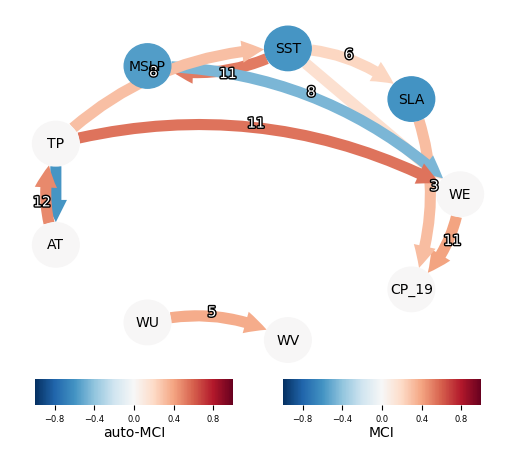

In [85]:
graph = toys.links_to_graph(parents)

tp.plot_graph(graph=graph, val_matrix=val_matrix, var_names=var_names); plt.show()

In [86]:
med.fit_model_bootstrap(boot_blocklength=1, seed=42, boot_samples=100)

In [87]:
# Get Causal effect and 90% confidence interval
print(med.get_ce(i=1, tau=-3,  j=8))
print(med.get_bootstrap_of(function='get_ce', 
    function_args={'i':1, 'tau':-3,  'j':8}, conf_lev=0.90))

0.30698485223864025
[0.0815955  0.46767618]


In [89]:
idx = val_matrix[:, 8, :].nonzero()

Text(0, 0.5, 'Causal effect estimation')

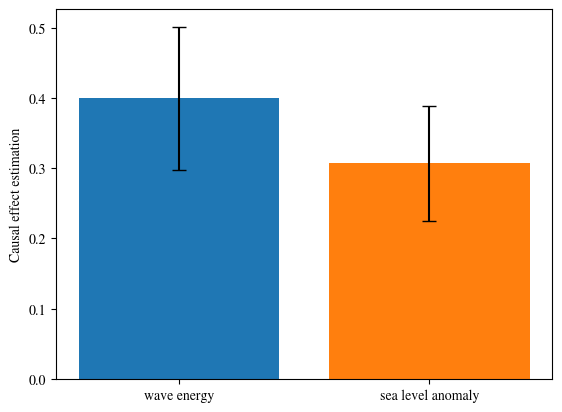

In [106]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

plt.bar(['wave energy', 'sea level anomaly'], [val_matrix[:, 8, :][idx][0], val_matrix[:, 8, :][idx][1]], yerr=[0.10168095, 0.0815955], color=[colors[0], colors[1]], capsize=5)
plt.ylabel('Causal effect estimation')

In [92]:
print ("Causal effect (0, -2) --> 2: ", med.get_ce(i=0, tau=-11, j=8))

Causal effect (0, -2) --> 2:  0.3994580147844202
